In [99]:
import gdelt
import pandas as pd
import numpy as np

In [314]:
gd1 = gdelt.gdelt(version=1)

In [308]:
results= gd1.Search('2020-01-01',table='gkg')
print(len(results))

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()


48751


In [98]:
results.head()

,DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
1,20200101,1,NaN,NaN,"4#Swindon, Swindon, United Kingdom#UK#UKN9#51....",dion conroy;ellis iandolo;keshi anderson;richi...,NaN,"-1.86480186480187,1.63170163170163,3.496503496...",NaN,thisiswiltshire.co.uk,https://www.thisiswiltshire.co.uk/news/headlin...
2,20200101,1,"KILL#2#Army jawans#4#Jammu, Jammu And Kashmir,...",MILITARY;TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES...,"4#Jammu, Jammu And Kashmir, India#IN#IN12#32.7...",devender anand;khari thrayat;rajouri nowshehra,NaN,"-8.58895705521472,0,8.58895705521472,8.5889570...","896165231,896165315,896165318,896165385",deccanchronicle.com,https://www.deccanchronicle.com/nation/current...
3,20200101,1,NaN,TAX_ECON_PRICE;FUELPRICES;ECON_GASOLINEPRICE;E...,"3#Miami, Florida, United States#US#USFL#25.774...",los angeles,NaN,"0.827814569536424,1.98675496688742,1.158940397...",NaN,einnews.com,https://energy.einnews.com/pr_news/506149118/2...
4,20200101,1,NaN,GENERAL_HEALTH;MEDICAL;SOC_POINTSOFINTEREST;SO...,"4#Zagreb, Zagreb, Grad, Croatia#HR#HR21#45.8#1...",ivana vu;hugo conrad;tomislav-jurica ka;jozo k...,foundation hospital,"3.16742081447964,3.61990950226244,0.4524886877...","896166442,896166775",philamirror.info,http://philamirror.info/2020/01/02/new-stamps-...
5,20200101,2,NaN,MEDIA_MSM;WB_678_DIGITAL_GOVERNMENT;WB_694_BRO...,"3#Washington, Washington, United States#US#USD...",NaN,freedom forum,"0,1.66666666666667,1.66666666666667,3.33333333...",NaN,deadline.com;deadline.com,https://deadline.com/tag/freedom-forum/<UDIV>h...


In [120]:
results = results[np.invert(pd.isna(results["THEMES"]))]

In [121]:
theme101 = [i.lower().split(";") for i in results["THEMES"]]

In [126]:
theme101 = [i[:-1] for i in theme101]

In [135]:
import itertools
a = theme101
theme_101 = list(itertools.chain.from_iterable(a))

test with nltk

In [137]:
import nltk

In [138]:
nltk.FreqDist(theme_101)

FreqDist({'tax_fncact': 38715, 'epu_policy': 19630, 'tax_ethnicity': 19265, 'crisislex_crisislexrec': 18113, 'tax_worldlanguages': 14276, 'uspec_politics_general1': 13889, 'ungp_forests_rivers_oceans': 13530, 'crisislex_c07_safety': 13352, 'leader': 13310, 'soc_pointsofinterest': 13224, ...})

need datetime to pass in to the search engine -> need to generate the input date string

In [149]:
import datetime

dt = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 5, 1)
step = datetime.timedelta(days=1)

date_string = []

while dt < end:
    date_string.append(dt.strftime('%Y-%m-%d'))
    dt += step

In [152]:
date_string[:4]

['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04']

写成function抓取每天的theme list (same as before but in function)

In [151]:
def get_theme(day, gd):
    results = gd.Search(day,table='gkg')
    results = results[np.invert(pd.isna(results["THEMES"]))]
    theme_ls = [i.lower().split(";") for i in results["THEMES"]]
    theme_ls= [i[:-1] for i in theme_ls]
    theme_ls = list(itertools.chain.from_iterable(theme_ls))
    return (theme_ls)

In [319]:
news_num = [gd1.Search(i,table='gkg').shape[0] for i in date_string]

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()


test

In [154]:
get_theme(date_string[1], gd1)[:5]

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()


['ungp_forests_rivers_oceans',
 'sanitation',
 'crime_illegal_drugs',
 'public_transport',
 'tax_fncact']

In [156]:
all_theme_list = []
for i in date_string:
    all_theme_list.append(get_theme(i, gd1))

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()
C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns 

C:\Users\Jieyi\Anaconda3\lib\site-packages\gdelt\base.py:648: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  results.columns = results.ix[0].values.tolist()


In [162]:
df_out = pd.DataFrame({"date":date_string, "theme":all_theme_list})

In [163]:
df_out.to_csv(r"C:\Users\Jieyi\Downloads\df_theme.csv")

In [164]:
df_out.head()

,date,theme
0,2020-01-01,"[military, tax_worldlanguages, tax_worldlangua..."
1,2020-01-02,"[ungp_forests_rivers_oceans, sanitation, crime..."
2,2020-01-03,"[tax_fncact, tax_fncact_authorities, crisislex..."
3,2020-01-04,"[tax_fncact, tax_fncact_secretary, tax_fncact_..."
4,2020-01-05,"[manmade_disaster_implied, tax_fncact, tax_fnc..."


In [167]:
df_list = pd.read_csv(r"C:\Users\Jieyi\Downloads\LOOKUP-GKGTHEMES.txt", sep="\n", header=None)

In [181]:
df_list.head(10)

,0
0,TAX_FNCACT\t779120478
1,TAX_ETHNICITY\t324224345
2,EPU_POLICY\t284818778
3,CRISISLEX_CRISISLEXREC\t279041209
4,TAX_WORLDLANGUAGES\t274229967
5,LEADER\t233621641
6,SOC_POINTSOFINTEREST\t231609154
7,USPEC_POLITICS_GENERAL1\t230120531
8,WB_696_PUBLIC_SECTOR_MANAGEMENT\t215217849
9,UNGP_FORESTS_RIVERS_OCEANS\t210816523


In [184]:
list_new = [i.split("\t")[0] for i in df_list.iloc[:, 0]]

In [186]:
list_new = [i.lower() for i in list_new]

In [187]:
list_new[1:4]

['tax_ethnicity', 'epu_policy', 'crisislex_crisislexrec']

see how they overlapped

In [242]:
len(list(set(all_theme_listlist_list[1]) & set(list_new)))

9509

In [196]:
len(list(set(df_out['theme'][1]) & set(list_new)))

9509

In [198]:
len(list(set(df_out['theme'][1])))

9515

In [199]:
len(list(set(df_out['theme'][2]) & set(list_new)))

9352

In [200]:
len(list(set(df_out['theme'][2])))

9362

In [201]:
from collections import Counter

In [203]:
Counter(list_new[1:4])['tax_ethnicity']

1

In [214]:
Counter(all_theme_list[1])["sanitation"]

409

In [301]:
df_final = pd.DataFrame({"themes":list_new})

In [238]:
len(list_new)

56840

In [278]:
counter_temp = Counter(all_theme_list[1])

In [279]:
list(counter_temp.keys())[100]

'wb_866_connectivity_and_lagging_regions'

In [281]:
if list(counter_temp.keys())[101] in df_final["themes"].values:
    print("a")

a


In [290]:
df_final.loc[df_final["themes"]=="tax_fncact","2020-01-02"] = 1

In [291]:
df_final.loc["tax_fncact","2020-01-02"] = 1

In [303]:
for k, i in enumerate(date_string):
    df_final[i] = [0]*df_final.shape[0]
    counter_temp = Counter(all_theme_list[k])
    key_ls = list(counter_temp.keys())
    for j in key_ls:
        if j in df_final["themes"].values:
            df_final.loc[df_final["themes"] == j, i] = counter_temp[j]
        else:
            row_num = df_final.shape[0]
            col_num = df_final.shape[1]
            df_final.loc[row_num] = [j] + [0]*(col_num - 2) + [1]

In [299]:
df_final.shape

(56851, 3)

In [304]:
df_final


,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,tax_fncact,38715,60290,67725,40469,36985,71143,80095,83804,83510,...,82478,85476,85928,80086,45966,39684,72786,82304,84150,86103
1,tax_ethnicity,19265,28466,34864,21783,21464,36145,39978,44531,41083,...,36126,37506,38542,35054,19830,18451,32174,35082,36382,37317
2,epu_policy,19630,29291,32277,19607,18821,32345,37633,39421,39411,...,41290,42843,42748,39982,22933,20598,36458,40683,42065,43042
3,crisislex_crisislexrec,18113,26661,32636,21047,19800,32567,36015,40342,37627,...,46409,48114,47702,44714,26404,23549,39743,44251,45652,46541
4,tax_worldlanguages,14276,21284,23060,14157,13404,23341,26649,29827,28684,...,26349,26831,27830,25746,15149,13597,23373,25938,27066,27720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57235,tax_disease_ceruminous_adenoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57236,tax_worldlanguages_yeh_jen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57237,tax_worldmammals_bornean_horseshoe_bat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57238,tax_worldbirds_yellowbilled_jacamar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [321]:
df_final_2 = df_final.copy()

In [326]:
df_final_2.head(30)

,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,tax_fncact,38715,60290,67725,40469,36985,71143,80095,83804,83510,...,82478,85476,85928,80086,45966,39684,72786,82304,84150,86103
1,tax_ethnicity,19265,28466,34864,21783,21464,36145,39978,44531,41083,...,36126,37506,38542,35054,19830,18451,32174,35082,36382,37317
2,epu_policy,19630,29291,32277,19607,18821,32345,37633,39421,39411,...,41290,42843,42748,39982,22933,20598,36458,40683,42065,43042
3,crisislex_crisislexrec,18113,26661,32636,21047,19800,32567,36015,40342,37627,...,46409,48114,47702,44714,26404,23549,39743,44251,45652,46541
4,tax_worldlanguages,14276,21284,23060,14157,13404,23341,26649,29827,28684,...,26349,26831,27830,25746,15149,13597,23373,25938,27066,27720
5,leader,13310,19232,24137,14666,14803,25148,27945,30999,29598,...,29957,31035,30693,29543,17110,15028,26756,30072,30179,31259
6,soc_pointsofinterest,13224,19919,24607,15011,13993,24103,27414,31857,29233,...,31937,34562,33449,31083,19021,16616,27636,31626,32978,32415
7,uspec_politics_general1,13889,19841,24241,14896,14565,25321,28052,31317,30399,...,26386,27482,27393,26281,14451,12554,22450,25820,26990,27179
8,wb_696_public_sector_management,10836,16712,18544,10969,9667,19209,22823,23428,25340,...,19932,21527,21410,20024,11477,9129,17585,20798,21912,22452
9,ungp_forests_rivers_oceans,13530,21312,23121,13716,13656,26011,29094,29960,30051,...,32195,35592,34928,31541,17581,14721,27861,32114,33261,34260


In [323]:
df_final_2.loc[57240] = ["news_num"] + news_num

In [325]:
df_final_2.to_csv(r"C:\Users\Jieyi\Downloads\gdelt_freq.csv")

In [332]:
df_final_2

,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,tax_fncact,38715,60290,67725,40469,36985,71143,80095,83804,83510,...,82478,85476,85928,80086,45966,39684,72786,82304,84150,86103
1,tax_ethnicity,19265,28466,34864,21783,21464,36145,39978,44531,41083,...,36126,37506,38542,35054,19830,18451,32174,35082,36382,37317
2,epu_policy,19630,29291,32277,19607,18821,32345,37633,39421,39411,...,41290,42843,42748,39982,22933,20598,36458,40683,42065,43042
3,crisislex_crisislexrec,18113,26661,32636,21047,19800,32567,36015,40342,37627,...,46409,48114,47702,44714,26404,23549,39743,44251,45652,46541
4,tax_worldlanguages,14276,21284,23060,14157,13404,23341,26649,29827,28684,...,26349,26831,27830,25746,15149,13597,23373,25938,27066,27720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57236,tax_worldlanguages_yeh_jen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57237,tax_worldmammals_bornean_horseshoe_bat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57238,tax_worldbirds_yellowbilled_jacamar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57239,tax_disease_seborrheic_dermatitis_of_scalp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [340]:
jan_col = [0]*57241
for i in range(1,33):
    jan_col = np.add(jan_col, df_final_2.iloc[:, i])

In [342]:
feb_col = [0]*57241
for i in range(33,62):
    feb_col = np.add(feb_col, df_final_2.iloc[:, i])

In [343]:
mar_col = [0]*57241
for i in range(62,92):
    mar_col = np.add(mar_col, df_final_2.iloc[:, i])

In [345]:
apr_col = [0]*57241
for i in range(92,122):
    apr_col = np.add(apr_col, df_final_2.iloc[:, i])

In [347]:
df_last = pd.DataFrame({"themes":df_final_2['themes'].values, "Jan": jan_col, "Feb":feb_col, "Mar":mar_col, "Apr":apr_col})

In [365]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from matplotlib.pyplot import figure

In [447]:
df_plot = df_last.iloc[[19, 5901, 11, 141, 41, 14, 21, 53,18,1,7] , :]

In [432]:
df_plot

,themes,Jan,Feb,Mar,Apr
19,medical,477136,540382,1090727,1145543
5901,tax_disease_coronavirus,82765,250703,1125197,1172270
11,general_government,621567,583315,761922,730758
141,tax_fncact_workers,96615,110341,288275,394239
41,wb_2670_jobs,300306,295639,346761,383671
14,education,550788,555541,692505,601527
21,wb_133_information_and_communication_technologies,421859,398671,444346,452538
53,epu_economy,267661,262708,371650,433321
18,epu_economy_historic,611067,597257,742301,769769
1,tax_ethnicity,1056716,984598,1002454,944181


In [433]:
df_plot = df_plot.T.iloc[1:, :]

In [440]:
df_plot

,health,disease,government,education,IT,economy,others,employment
Jan,477136,82765,621567,550788,421859,267661,1056716,396921
Feb,540382,250703,583315,555541,398671,262708,984598,405980
Mar,1090727,1125197,761922,692505,444346,371650,1002454,635036
Apr,1145543,1172270,730758,601527,452538,433321,944181,777910


In [435]:
df_plot["employment"] = df_plot[141] + df_plot[41]

In [437]:
df_plot = df_plot.copy().iloc[:, [0,1,2,5,6,7,9,11]]

In [427]:
df_plot_2 = df_plot_2.copy().iloc[:, [0,1,2,3,4,5,7,9]]

In [439]:
df_plot.columns = ["health", "disease", "government", "education","IT","economy", "others","employment"]

Text(0, 0.5, 'Number')

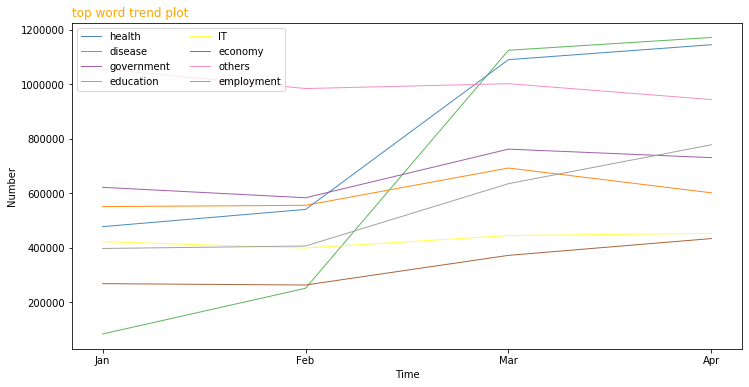

In [444]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df_plot:
    num+=1
    plt.plot(df_plot.index.values, df_plot[column], marker='', 
             color=palette(num), linewidth=1, alpha=0.9, label=column)
    
plt.legend(loc=2, ncol=2)
 
# titles
plt.title("top word trend plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Number")

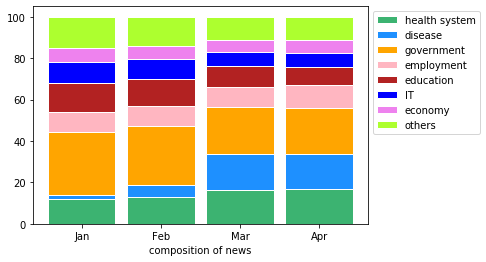

<Figure size 864x288 with 0 Axes>

In [448]:
# Data
bar1 = df_plot.iloc[0, 1:].values
bar2 = df_plot.iloc[1, 1:].values
bar3 = df_plot.iloc[2, 1:].values + df_plot.iloc[8, 1:].values
bar4 = df_plot.iloc[3, 1:].values + df_plot.iloc[4, 1:].values
bar5 = df_plot.iloc[5, 1:].values
bar6 = df_plot.iloc[6, 1:].values
bar7 = df_plot.iloc[7, 1:].values
bar8 = df_plot.iloc[8, 1:].values

r = [0,1,2,3]
raw_data = {'bar1': bar1, 'bar2': bar2,'bar3': bar3,
           'bar4': bar4, 'bar5': bar5, 'bar6': bar6, 'bar7': bar7, 'bar8':bar8}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df['bar1'], df['bar2'], df['bar3'], df['bar4'],
                                                    df['bar5'], df['bar6'], df['bar7'],df['bar8'])]
Bars1 = [i / j * 100 for i,j in zip(df['bar1'], totals)]
Bars2 = [i / j * 100 for i,j in zip(df['bar2'], totals)]
Bars3 = [i / j * 100 for i,j in zip(df['bar3'], totals)]
Bars4 = [i / j * 100 for i,j in zip(df['bar4'], totals)]
Bars5 = [i / j * 100 for i,j in zip(df['bar5'], totals)]
Bars6 = [i / j * 100 for i,j in zip(df['bar6'], totals)]
Bars7 = [i / j * 100 for i,j in zip(df['bar7'], totals)]
Bars8 = [i / j * 100 for i,j in zip(df['bar8'], totals)]
 
# plot
barWidth = 0.85
names = ('Jan','Feb','Mar',"Apr")
# Create green Bars
plt.bar(r, Bars1, color='mediumseagreen', edgecolor='white', width=barWidth, label = "health system")
# Create orange Bars
plt.bar(r, Bars2, bottom=Bars1, color='dodgerblue', edgecolor='white', width=barWidth, label = "disease")
# Create blue Bars
plt.bar(r, Bars3, bottom=[i+j for i,j in zip(Bars1, Bars2)], color='orange', edgecolor='white', width=barWidth,
       label = "government")
plt.bar(r, Bars4, bottom=[i+j+k for i,j,k in zip(Bars1, Bars2, Bars3)], color='lightpink', 
        edgecolor='white', width=barWidth, label = "employment")
plt.bar(r, Bars5, bottom=[i+j+k+l for i,j,k,l in zip(Bars1, Bars2, Bars3, Bars4)], color='firebrick', 
        edgecolor='white', width=barWidth, label = "education")
plt.bar(r, Bars6, bottom=[i+j+k+l+m for i,j,k,l,m in zip(Bars1, Bars2, Bars3, Bars4, Bars5)], color='blue', 
        edgecolor='white', width=barWidth, label = "IT")
plt.bar(r, Bars7, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(Bars1, Bars2, Bars3, Bars4, Bars5, Bars6)], color='violet', 
        edgecolor='white', width=barWidth, label = "economy")
plt.bar(r, Bars8, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(Bars1, Bars2, Bars3, 
                                                                 Bars4, Bars5, Bars6,Bars7)], color='greenyellow', 
        edgecolor='white', width=barWidth, label = "others")


# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("composition of news")
figure(figsize = (12,4))
 
# Show graphic
plt.show()

## reference: 
https://python-graph-gallery.com/13-percent-stacked-barplot/

https://python-graph-gallery.com/124-spaghetti-plot/